<a href="https://colab.research.google.com/github/airctic/icedata/blob/master/notebooks/dev/oidv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Warning
This notebook is a work in progress document. We are sharing it with the IceVision Community through our Live Code Session (beginners-friendly). If you are interested in attending, please feel free to [join us](http://tinyurl.com/IceData)

## About the Open Images Sample Dataset
This dataset represents an [Open Images Dataset v4](https://storage.googleapis.com/openimages/web/index.html) subset that contains some fruit images (Apple Orange Pineapple Banana Pear). Each class roughly contains 50 images. Those images are extracted using the [Open Image Dataset v4 Toolkit](https://github.com/EscVM/OIDv4_ToolKit)  

# How to create a new dataset using OIDv4 Toolkit

> **Goal**: This notebook shows how to create a custom parser for a dataset created using the [Open Image Dataset v4 Toolkit](https://github.com/EscVM/OIDv4_ToolKit). The Open Image Dataset uses a special text annotation. Using IceVision will create a custom parser specifically designed for those annotations. 

# Installing IceVision

!!! warning "Google Colab Dependencies Incompatibilities "
    This issue is specific to Google Colab. The issue shouldn't occur on a local machine.
    Some of our external dependencies are not aligned with the dependencies pre-installed in Google Colab. 
    After pip installing both icevision and icedata (by runnning the cell here below), some errors will eventually pop up.
    To fix this issue, press the **RESTART RUNTIME** button.

In [ ]:
!pip install icevision[all] icedata

In [11]:
from icevision.all import *

### Cloning OIDv4 Toolkit

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

In [4]:
%cd OIDv4_ToolKit/
!ls

/content/OIDv4_ToolKit
classes.txt  LICENSE  modules  README.md
images	     main.py  OID      requirements.txt


### Installing requirements

In [ ]:
!pip install -r requirements.txt

## Downloading dataset using a script

In [6]:
!python main.py downloader --classes Apple Orange Pineapple Banana Pear --type_csv train --limit 50 --Dataset fruits


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Apple.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 49745 KB/s, 0 seconds passed
[DOWNLOAD] | File cl

In [13]:
!ls OID/fruits/train/Apple/Label/

004be96d7985d83e.txt  4afe9ab88793b61d.txt  a2b98b1864914c66.txt
0105b1990ae06ba0.txt  4f80ffacb5a739ad.txt  a875fc7fab2dce6b.txt
02d39303ce22fcc2.txt  5444b98b94cd117c.txt  c38ee0bc2554a6dc.txt
02d4db21024cbe70.txt  582c84041321da1e.txt  c67dc18751bb9cb0.txt
064488ad0730e061.txt  5e39af2bfb78fae1.txt  cac550631e35c126.txt
0832353857d358d1.txt  5ffb52b70070cd9d.txt  cc48c73b8406f7c8.txt
10d3fae6ca98ebea.txt  60cfbe06c2014b76.txt  cd3d607d7bb6f372.txt
121dcf037172b59d.txt  622f116751cd404f.txt  d207b14cdf12fd65.txt
18e4ba084540935c.txt  66d425c505456a67.txt  d4d46bff1bf0dcc4.txt
19e8334d666c67cc.txt  6eca3719700d60bb.txt  d601bb37c298fec8.txt
1bee85275cc7f4c8.txt  7099ed0818bfb7b5.txt  d60ca499f08f5618.txt
1fa4ba4b9e471e1d.txt  71a1cf8408afce76.txt  df8d7ee69ae12b36.txt
23694bd08d1b1848.txt  7243bb39ae8d770d.txt  e69b44f5e18e18a3.txt
27b0b9ed4781d2db.txt  7bb2bdd276cbcb1d.txt  fc1495b2e93e2708.txt
28e3f6fe762afd23.txt  87386cc97156bd90.txt  fcdcdfa19ed6046e.txt
3485e0b69848c5b9.txt  8c9

### Setting dataset directory

In [14]:
data_dir = Path("OID/fruits/train")

In [15]:
(data_dir/"Apple").ls()

(#51) [Path('OID/fruits/train/Apple/Label'),Path('OID/fruits/train/Apple/cc48c73b8406f7c8.jpg'),Path('OID/fruits/train/Apple/28e3f6fe762afd23.jpg'),Path('OID/fruits/train/Apple/3b5868a0dd3a427b.jpg'),Path('OID/fruits/train/Apple/064488ad0730e061.jpg'),Path('OID/fruits/train/Apple/6eca3719700d60bb.jpg'),Path('OID/fruits/train/Apple/e69b44f5e18e18a3.jpg'),Path('OID/fruits/train/Apple/95984758d6ad7905.jpg'),Path('OID/fruits/train/Apple/d60ca499f08f5618.jpg'),Path('OID/fruits/train/Apple/c38ee0bc2554a6dc.jpg')...]

## Parser

In [16]:
_CLASSES = ["Apple", "Orange", "Pineapple", "Banana", "Pear"]
class_map = ClassMap(_CLASSES)

In [17]:
class_map.get_name("Pear")

5

In [18]:
class OIDParser(parsers.Parser, parsers.ImageidMixin, parsers.FilepathMixin, parsers.LabelsMixin, parsers.BBoxesMixin):
    def __init__(self, data_dir, class_map):
        self.data_dir = data_dir
        self.images_filepaths = get_image_files(data_dir)
        self.class_map = class_map

    def __iter__(self) -> Any:
        yield from self.images_filepaths

    def prepare(self, o):
        label_filepath = o.parent / f"Label/{o.with_suffix('.txt').name}"
        self.raw_labels = label_filepath.read_text().strip('\n').split('\n')

    def record_id(self, o) -> Hashable:
        return o.stem

    def filepath(self, o) -> Union[str, Path]:
        return o

    def labels(self, o) -> List[int]:
        labels = []
        for raw_label in self.raw_labels:
            label_tokens = raw_label.split()
            label_name = ' '.join(label_tokens[:len(label_tokens)-4])
            label = class_map.get_name(label_name)
            labels.append(label)
            
        return labels

    def bboxes(self, o) -> List[BBox]:
        bboxes = []
        for raw_label in self.raw_labels:
            label_tokens = raw_label.split()
            xyxy = np.array(label_tokens[-4:], dtype=float)
            bbox = BBox.from_xyxy(*xyxy)
            bboxes.append(bbox)

        return bboxes

In [19]:
parser = OIDParser(data_dir, class_map)

In [20]:
# Parsing records
train_records, valid_records = parser.parse()

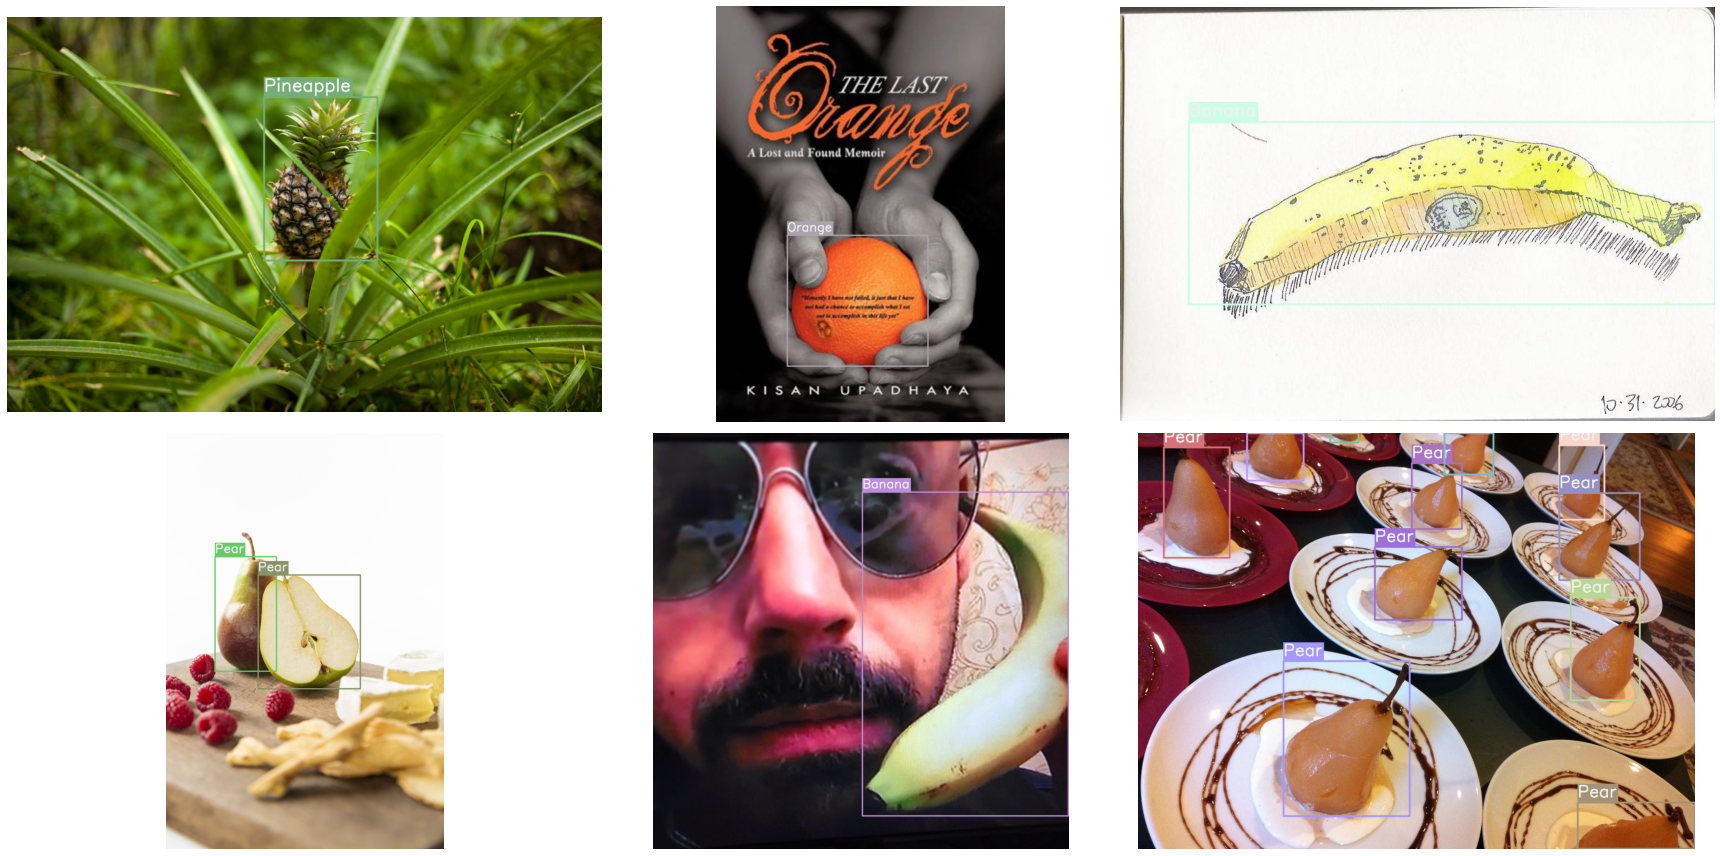

In [21]:
import random
sample_records = random.choices(train_records, k=6)
show_records(sample_records, ncols=3, class_map=class_map)

# Transforms

In [22]:
presize = 512
size = 384

train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=size, presize=presize), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=size), tfms.A.Normalize()])

### Train and Validation Dataset Objects

In [23]:
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

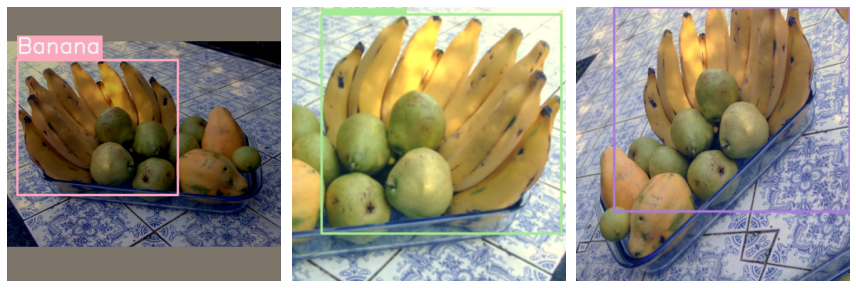

In [24]:
samples = [train_ds[10] for _ in range(3)]
show_samples(samples, class_map=class_map, denormalize_fn=denormalize_imagenet, ncols=3)

### DataLoaders

In [25]:
model_type = efficientdet # faster_rcnn # efficientdet

In [26]:
train_dl = model_type.train_dl(train_ds, batch_size=16, num_workers=4, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=16, num_workers=4, shuffle=False)

## Model

In [27]:
model = model_type.model('tf_efficientdet_lite0', num_classes=len(class_map), img_size=size) # efficientdet
# model = model_type.model(num_classes=len(class_map)) # faster_rcnn

Downloading: "https://github.com/rwightman/efficientdet-pytorch/releases/download/v0.1/tf_efficientdet_lite0-f5f303a9.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientdet_lite0-f5f303a9.pth


## Training

In [28]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

In [29]:
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

## Learning Rate Finder

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.10000000149011612)

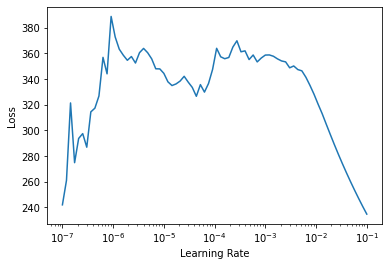

In [30]:
learn.freeze()
learn.lr_find()

### Fine tune: 2 Phases
- Phase 1: Train the head for 1 epochs while freezing the body
- Phase 2: Train both the body and the head during 10 epochs

In [38]:
from fastai.callback.tracker import SaveModelCallback
learn.fine_tune(10, 0.012, freeze_epochs=1, cbs=SaveModelCallback(monitor='COCOMetric', fname='bccd-faster-rcnn'))

Better model found at epoch 0 with COCOMetric value: 0.1476898361485698.


Better model found at epoch 0 with COCOMetric value: 0.21165122664101887.


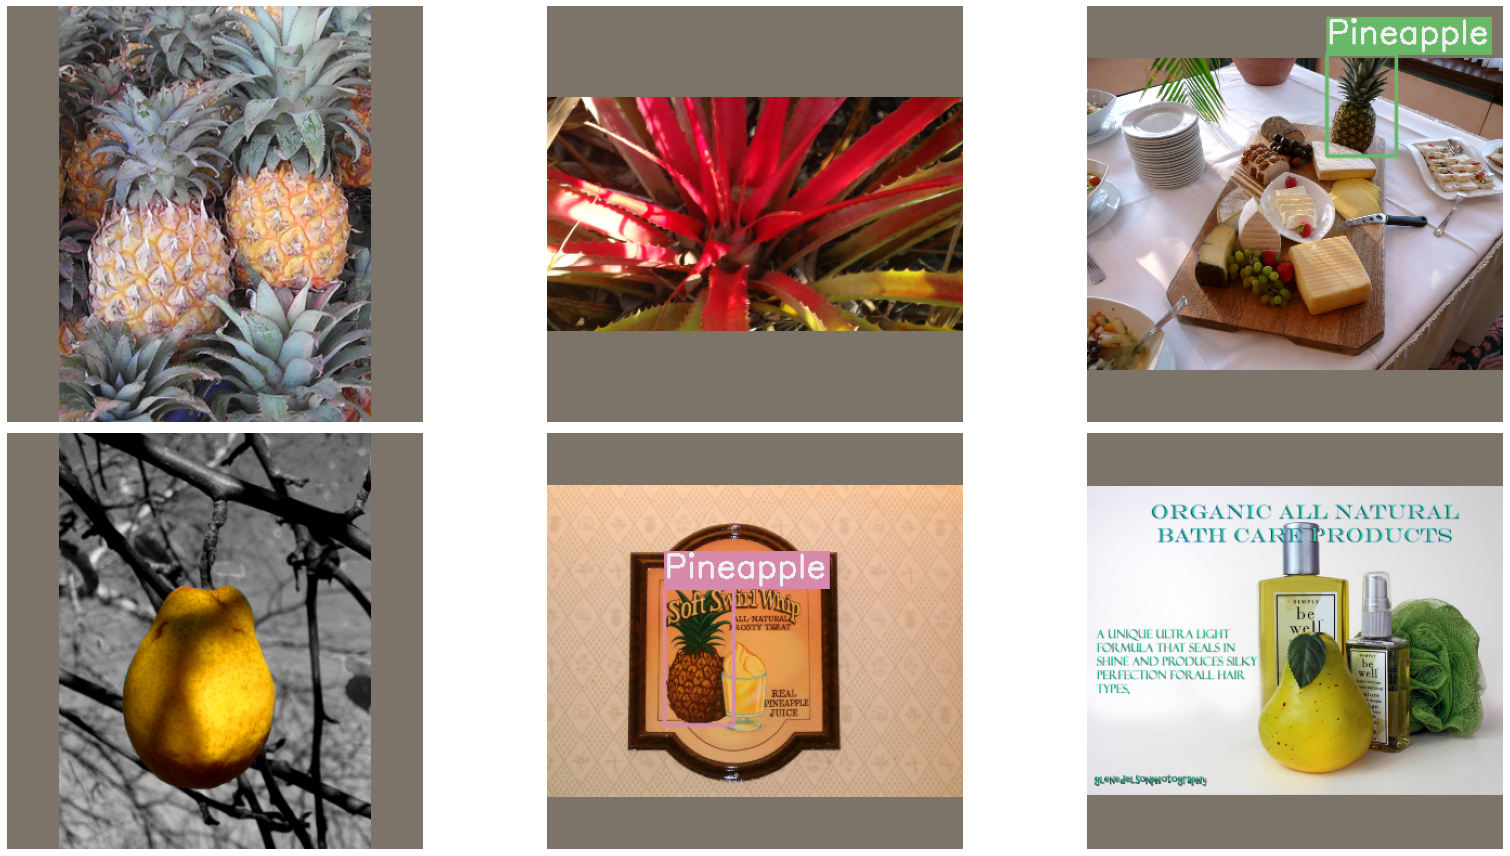

In [39]:
model_type.show_results(model, valid_ds, class_map=class_map)

## Happy Learning!

If you need any assistance, feel free to join our [forum](https://discord.gg/JDBeZYK).